In [87]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")
warnings.filterwarnings("ignore", "is_sparse")


In [88]:
# model_name, version, run_descr = 'with_aug', 0, 'BATF2 GHTS/CHS'
model_name, version, run_descr = 'only_one_exp', 0, 'BATF2 GHTS/GHTS'
path_to_models = '/home/nikgr/mex_models/%s/model'
path_to_metrics = (path_to_models + '/lightning_logs/version_%d/metrics.csv') % (model_name, version)
path_to_preds = (path_to_models % model_name) + '/predictions_new_format.tsv'
model_full_descr = 'LegNet (%s)' % (model_name)

In [89]:
metrics_df = pd.read_csv(path_to_metrics, sep=',')
metrics_df.head()
left_df = metrics_df[['val_loss', 'val_auroc', 'epoch', 'step']].dropna()
right_df = metrics_df[['epoch', 'step', 'train_loss']].dropna()
metrics_df = pd.merge(left_df, right_df, on=['epoch', 'step'])
metrics_df.head()

,val_loss,val_auroc,epoch,step,train_loss
0,0.228045,0.791779,0,70,0.557764
1,0.051428,0.896715,1,141,0.158566
2,0.036258,0.912547,2,212,0.044999
3,0.053801,0.951032,3,283,0.033199
4,0.027393,0.970164,4,354,0.027215


In [90]:
metrics_df.tail()

,val_loss,val_auroc,epoch,step,train_loss
10,0.016927,0.987391,10,780,0.012881
11,0.016611,0.989719,11,851,0.011710
12,0.017180,0.983909,12,922,0.009367
13,0.017557,0.987008,13,993,0.008683
14,0.017381,0.985514,14,1064,0.007882


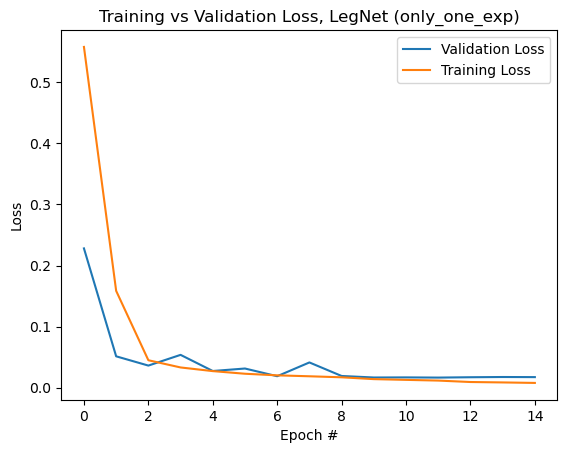

In [91]:
plt.plot(metrics_df['epoch'], metrics_df['val_loss'], label='Validation Loss')
plt.plot(metrics_df['epoch'], metrics_df['train_loss'], label='Training Loss')
plt.title('Training vs Validation Loss, %s' % model_full_descr)
plt.ylabel('Loss')
plt.xlabel('Epoch #')
plt.legend(loc='upper right')
plt.show()


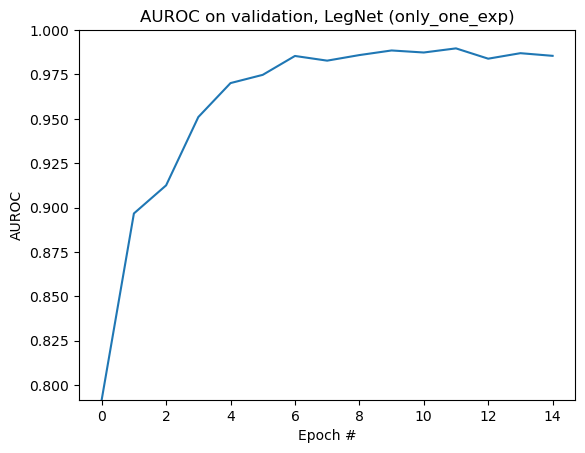

In [100]:
ax = plt.axes()
ax.set_ylim(metrics_df['val_auroc'].min(), 1)
plt.plot(metrics_df['epoch'], metrics_df['val_auroc'])
plt.title('AUROC on validation, %s' % model_full_descr)
plt.ylabel('AUROC')
plt.xlabel('Epoch #')
plt.show()

In [93]:
preds_df = pd.read_csv(path_to_preds, sep='\t')
preds_df['avg_pred'] = (preds_df['forw_pred'] + preds_df['rev_pred']) / 2
preds = ('forw_pred', 'rev_pred', 'avg_pred')
preds_names = {'forw_pred': 'only forward', 'rev_pred': 'only reverse', 'avg_pred': 'averaged'}

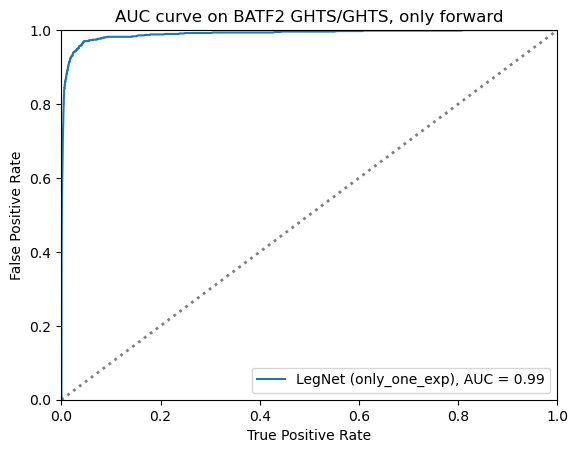

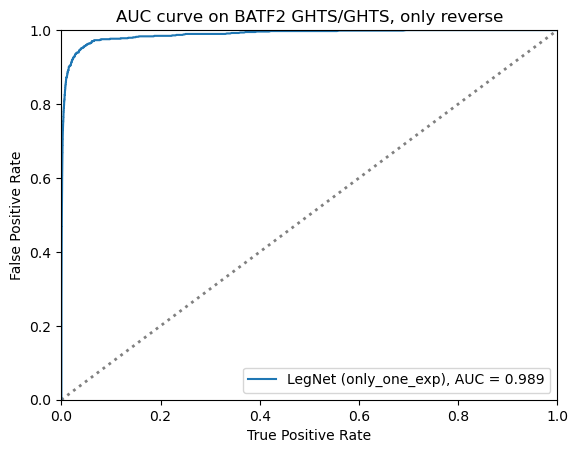

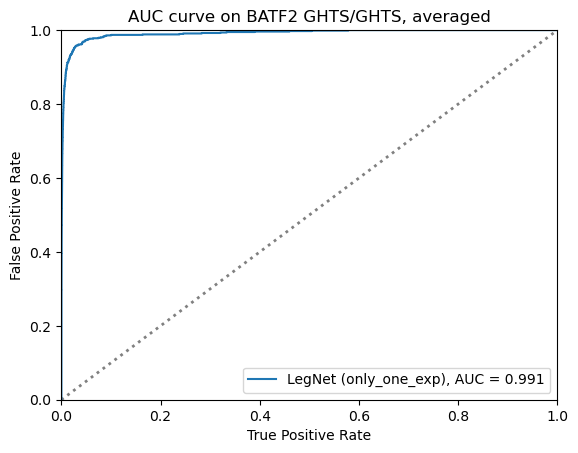

In [94]:
for pred in preds:
    fpr, tpr, _ = metrics.roc_curve(preds_df['class_'], preds_df[pred])
    auc = metrics.roc_auc_score(preds_df['class_'], preds_df[pred])

    ax = plt.axes()
    ax.axline([0, 0], [1, 1], linewidth=2, color='grey', linestyle=':')
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)

    plt.plot(fpr, tpr, label=model_full_descr + f', AUC = {auc:.3}')
    plt.title(f'AUC curve on {run_descr}, {preds_names[pred]}')
    plt.ylabel('False Positive Rate')
    plt.xlabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

In [95]:
preds_df.head()

,chr,start,end,class_,forw_pred,rev_pred,avg_pred
0,chr10,75978,76279,0,0.000752,0.001008,0.000880
1,chr10,81218,81519,0,0.003185,0.008644,0.005915
2,chr10,81474,81775,0,0.000937,0.001169,0.001053
3,chr10,84045,84346,0,0.001519,0.002182,0.001850
4,chr10,119098,119399,0,0.000801,0.000621,0.000711


In [96]:
preds_df.tail()

,chr,start,end,class_,forw_pred,rev_pred,avg_pred
78268,chr8,143322775,143323076,1,0.04068,0.06980,0.05524
78269,chr8,143399064,143399365,1,0.08770,0.07666,0.08218
78270,chr8,143981852,143982153,1,0.57570,0.67800,0.62685
78271,chr8,144397893,144398194,1,0.45040,0.69500,0.57270
78272,chr8,144456769,144457070,1,0.98300,0.98300,0.98300
